In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from time import time
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")


In [2]:
#lets import data from csv file
titanic=pd.read_csv('/content/train.csv')
titanic = pd.read_csv("./train.csv", index_col=0)
titanic_final = pd.read_csv("./test.csv", index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Dropping the duplicates
titanic = titanic.drop_duplicates()

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Shape of the data that we are deaing with

print("NO. Of. Rows = %s" % titanic.shape[0])
print("NO. Of. Columns = %s" % titanic.shape[1])

NO. Of. Rows = 891
NO. Of. Columns = 12


In [ ]:
#Using pandas options to set float_format to 2 decimals after the point.
pd.options.display.float_format = '{:.2f}'.format   #This makes the table clear and easy to understand

In [ ]:
#Numerical and Categorical features
numerical_feats = titanic.dtypes[titanic.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = titanic.dtypes[titanic.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


Skewness: 0.478523
Kurtosis: -1.775005


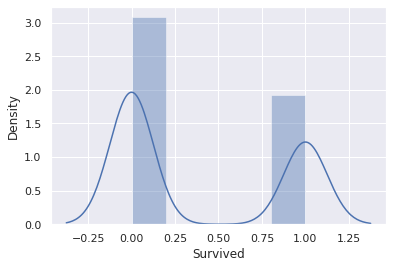

In [ ]:
#Skewness and Kurtosis of the target variable
# Skew and kurt
sns.distplot(titanic['Survived']);
print("Skewness: %f" % titanic['Survived'].skew())
print("Kurtosis: %f" % titanic['Survived'].kurt())

In [ ]:

for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(titanic[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(titanic[col].kurt())  
         )

PassengerId     Skewness: 00.00     Kurtosis: -01.20
Survived        Skewness: 00.48     Kurtosis: -01.78
Pclass          Skewness: -0.63     Kurtosis: -01.28
Age             Skewness: 00.39     Kurtosis: 000.18
SibSp           Skewness: 03.70     Kurtosis: 017.88
Parch           Skewness: 02.75     Kurtosis: 009.78
Fare            Skewness: 04.79     Kurtosis: 033.40


In [ ]:
#SUMMARY OF ONLY CATEGORICAL TYPE
titanic.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [ ]:
#SUMMARY OF ONLY Numerical TYPE
titanic.describe(include=['int','float64']).T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


In [ ]:
#Checking for the unique values present in the numerical features.
for i in titanic.columns:
    if(titanic[i].dtype!=type(object)):
        print(i,':\n',titanic[i].unique(),'\n')

PassengerId :
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243

In [ ]:
# Printing no of outliers in Numerical column
for i in titanic.columns:
    if(titanic[i].dtype!=type(object)):
        q1=titanic[i].quantile(0.25)
        q3=titanic[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        out_ub=titanic[titanic[i]>ub][i]
        out_lb=titanic[titanic[i]<lb][i]
        print("no of outliers in",i,"is",len(out_ub)+len(out_lb))

no of outliers in PassengerId is 0
no of outliers in Survived is 0
no of outliers in Pclass is 0
no of outliers in Age is 11
no of outliers in SibSp is 46
no of outliers in Parch is 213
no of outliers in Fare is 116


{'whiskers': [<matplotlib.lines.Line2D at 0x7f72cab31cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f72cab387d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f72cab31210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f72cab3f290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f72cab3f810>],
 'means': []}

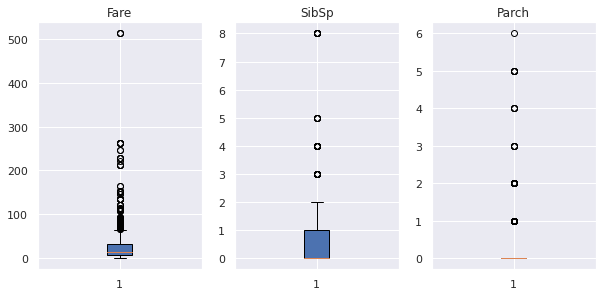

In [ ]:
#ploting boxplot for all columns to check wheather the outliers are present in dataset or not. 
plt.figure(figsize=(10,10))


plt.subplot(2,3,1)
plt.title('Fare')
plt.boxplot(titanic['Fare'],patch_artist=True)


plt.subplot(2,3,2)
plt.title('SibSp')
plt.boxplot(titanic['SibSp'],patch_artist=True)

plt.subplot(2,3,3)
plt.title('Parch')
plt.boxplot(titanic['Parch'],patch_artist=True)


 DATA PRE PROCESSING AND VISUALIZATION
 
PassengerID

In [ ]:
#Passengerid is a unique identity of passengers so this does not matter to Survival of a Passenger So, 
#let's drop Passengerid feature
titanic=titanic.drop(['PassengerId'],1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


Pclass

In [ ]:
titanic['Pclass'].unique()

array([3, 1, 2])

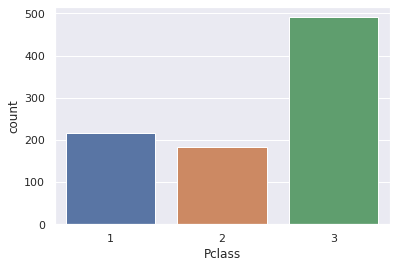

In [ ]:
sns.countplot(x=titanic['Pclass'])


In [ ]:
#Here we can see that highest number of passengers travelling in class 3,Lets see relation between Pclass and Survival

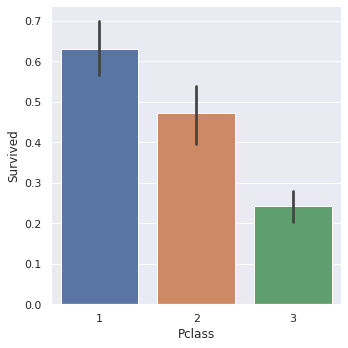

In [ ]:
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='bar')


Name


In [ ]:
#lets see top 5 row data
titanic['Name'].head()


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
#let's extract Titles of Passengers
titanic['Title']=titanic['Name'].str.extract('([A-Za-z]+)\.',)
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [3]:
df = pd.read_csv("./train.csv")
df.head()
titanic_test = titanic[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]
titanic_test["Family"] = titanic["SibSp"] + titanic["Parch"]
avg_age = titanic_test["Age"].dropna().mean()
titanic_test = titanic_test.dropna(subset=["Embarked"])


In [4]:
titanic_test["Age"] = titanic_test["Age"].fillna(avg_age.round(0))
titanic_test["Sex"] = titanic_test["Sex"].replace(["female", "male"], [0,1])
titanic_test["Embarked"] = titanic_test["Embarked"].replace(["S", "C", "Q"], [1, 2, 3])

In [5]:
X_train_set = titanic_test[["Pclass", "Sex", "Age", "Fare", "Embarked", "Family"]]
y_train_set = titanic_test["Survived"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train_set, y_train_set, test_size=0.20, random_state=10)
print(X_train, y_train)

             Pclass  Sex   Age     Fare  Embarked  Family
PassengerId                                              
58                3    1  28.5   7.2292         2       0
718               2    0  27.0  10.5000         1       0
823               1    1  38.0   0.0000         1       0
398               2    1  46.0  26.0000         1       0
165               3    1   1.0  39.6875         1       5
...             ...  ...   ...      ...       ...     ...
371               1    1  25.0  55.4417         2       1
322               3    1  27.0   7.8958         1       0
529               3    1  39.0   7.9250         1       0
127               3    1  30.0   7.7500         3       0
267               3    1  16.0  39.6875         1       5

[711 rows x 6 columns] PassengerId
58     0
718    1
823    0
398    0
165    0
      ..
371    1
322    0
529    0
127    0
267    0
Name: Survived, Length: 711, dtype: int64


In [7]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       115
           1       0.79      0.70      0.74        63

    accuracy                           0.83       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.83      0.82       178



In [8]:
print(confusion_matrix(y_test, y_pred))

[[103  12]
 [ 19  44]]


In [9]:
titanic_final.loc[titanic_final["Fare"].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [10]:
titanic_test_final = titanic_final[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
titanic_test_final["Family"] = titanic_final["SibSp"] + titanic_final["Parch"]
avg_age = titanic_test_final["Age"].dropna().mean()
titanic_test_final = titanic_test_final.dropna(subset=["Embarked"])
print(titanic_test_final.head(3))

             Pclass     Sex   Age    Fare Embarked  Family
PassengerId                                               
892               3    male  34.5  7.8292        Q       0
893               3  female  47.0  7.0000        S       1
894               2    male  62.0  9.6875        Q       0


In [11]:
titanic_test_final["Age"] = titanic_test_final["Age"].fillna(avg_age)
titanic_test_final["Sex"] = titanic_test_final["Sex"].replace(["female", "male"], [0,1])
titanic_test_final["Embarked"] = titanic_test_final["Embarked"].replace(["S", "C", "Q"], [1, 2, 3])
print(titanic_test_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Fare      417 non-null    float64
 4   Embarked  418 non-null    int64  
 5   Family    418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 22.9 KB
None


In [12]:
Pclass3Fareavg = titanic_test_final.loc[titanic_test_final["Pclass"] == 3]["Fare"].mean()
titanic_test_final = titanic_test_final.fillna(Pclass3Fareavg)
titanic_test_final.head()

,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,
892,3,1,34.5,7.8292,3,0
893,3,0,47.0,7.0000,1,1
894,2,1,62.0,9.6875,3,0
895,3,1,27.0,8.6625,1,0
896,3,0,22.0,12.2875,1,2


In [13]:
y_final = LR.predict(titanic_test_final)

In [14]:
titanic_final.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [15]:
final = pd.DataFrame(y_final, index=titanic_final.index)
final.columns=["Survived"]

In [16]:
final

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [17]:
final.to_csv("submission.csv")